<a href="https://colab.research.google.com/github/AndresCMontejo/TelecomX_proyecto_parte2/blob/main/Proyecto_TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDICCIÓN DE CANCELACIÓN**

### **Misión**

 Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

### **Objetivo del desafío**
1.- Preparar los datos para el modelado (tratamiento, codificación, normalización).

2.- Realizar análisis de correlación y selección de variables.

3.- Entrenar dos o más modelos de clasificación.

4.- Evaluar el rendimiento de los modelos con métricas.

5.- Interpretar los resultados, incluyendo la importancia de las variables.

6.- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

### **Practicas**

✅ Preprocesamiento de datos para Machine Learning

✅ Construcción y evaluación de modelos predictivos

✅ Interpretación de resultados y entrega de insights

✅ Comunicación técnica con enfoque estratégico

## **Importando libreria de Pandas**

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Extracción del Archivo Tratado**

In [194]:
df = pd.read_csv('/content/drive/MyDrive/ETL/df_filtrado_2.csv')

In [195]:
df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias,total_servicios
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.155059,4
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.967806,3
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.427727,2
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.219448,5
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.756242,3


In [197]:
df.columns

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total', 'cuentas_diarias',
       'total_servicios'],
      dtype='object')

## **Eliminación de Columnas Irrelevantes**

Eliminando las columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

**Columnas a eliminar**
Analizando el dataframe, observamos que las columnas que conviene eliminar (ID/identificadores) son las customerID, phone, account, ya que estos son identificadores o datos de contacto que no aportan señal predictiva y pueden meter ruido a nuestro analisis.

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   int64  
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   int64  
 11  internet_onlinebackup      7043 non-null   int64  
 12  internet_deviceprotection  7043 non-null   int64  
 13  internet_techsupport       7043 non-null   int64

In [201]:
df = df.drop(columns=['customerid'])

In [202]:
df_clean = df.copy()

In [203]:
df.columns

Index(['churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total', 'cuentas_diarias',
       'total_servicios'],
      dtype='object')

In [204]:
cols_to_fix = ['internet_onlinesecurity',
       'internet_onlinebackup', 'internet_deviceprotection',
       'internet_techsupport', 'internet_streamingtv',
       'internet_streamingmovies']

In [205]:
for col in cols_to_fix:
  df_clean[col] = df_clean[col].replace('No internet service', 'No')

In [206]:
df_clean.columns

Index(['churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total', 'cuentas_diarias',
       'total_servicios'],
      dtype='object')

In [207]:
# Supongamos que df es tu DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Variables categóricas:", categorical_cols)

Variables categóricas: ['customer_gender', 'internet_internetservice', 'account_contract', 'account_paymentmethod']


In [208]:
categorical_cols = [
    'churn', 'customer_gender',
       'customer_partner', 'customer_dependents',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
     ]

## **Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [209]:
"""
# Cargando nuestro nuevo DataFrame filtrado.
df = pd.read_csv("/content/drive/MyDrive/ETL/datos_TelecomX_sin_IDs_constantes.csv")

# Identificando las columnas categóricas (object o category)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Columnas categóricas detectadas:", categorical_cols)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Forma del dataset original:", df.shape)
print("Forma del dataset codificado:", df_encoded.shape)

# Guardando el nuevo dataframe transformado
df_encoded.to_csv("datos_TelecomX_codificado.csv", index=False)
"""
df_encoded= pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [211]:
df_encoded.head()

,customer_seniorcitizen,customer_tenure,account_charges_monthly,account_charges_total,cuentas_diarias,total_servicios,churn_1,customer_gender_Male,customer_partner_1,customer_dependents_1,...,internet_deviceprotection_1,internet_techsupport_1,internet_streamingtv_1,internet_streamingmovies_1,account_contract_One year,account_contract_Two year,account_paperlessbilling_1,account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,0,9,65.6,593.30,2.155059,4,False,False,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.967806,3,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.427727,2,True,True,False,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.219448,5,True,True,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.756242,3,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [212]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer_seniorcitizen                         7043 non-null   int64  
 1   customer_tenure                                7043 non-null   int64  
 2   account_charges_monthly                        7043 non-null   float64
 3   account_charges_total                          7032 non-null   float64
 4   cuentas_diarias                                7043 non-null   float64
 5   total_servicios                                7043 non-null   int64  
 6   churn_1                                        7043 non-null   bool   
 7   customer_gender_Male                           7043 non-null   bool   
 8   customer_partner_1                             7043 non-null   bool   
 9   customer_dependents_1                          7043 

In [214]:
df_encoded.isnull().sum()

,0
customer_seniorcitizen,0
customer_tenure,0
account_charges_monthly,0
account_charges_total,11
cuentas_diarias,0
total_servicios,0
churn_1,0
customer_gender_Male,0
customer_partner_1,0
customer_dependents_1,0


In [215]:
df_encoded = df_encoded.dropna(subset=['account_charges_total'])

In [216]:
df_encoded.isnull().sum()

,0
customer_seniorcitizen,0
customer_tenure,0
account_charges_monthly,0
account_charges_total,0
cuentas_diarias,0
total_servicios,0
churn_1,0
customer_gender_Male,0
customer_partner_1,0
customer_dependents_1,0


In [217]:
#CORRELACIÓN ENTRE VARIABLES
corr = df_encoded.corr()

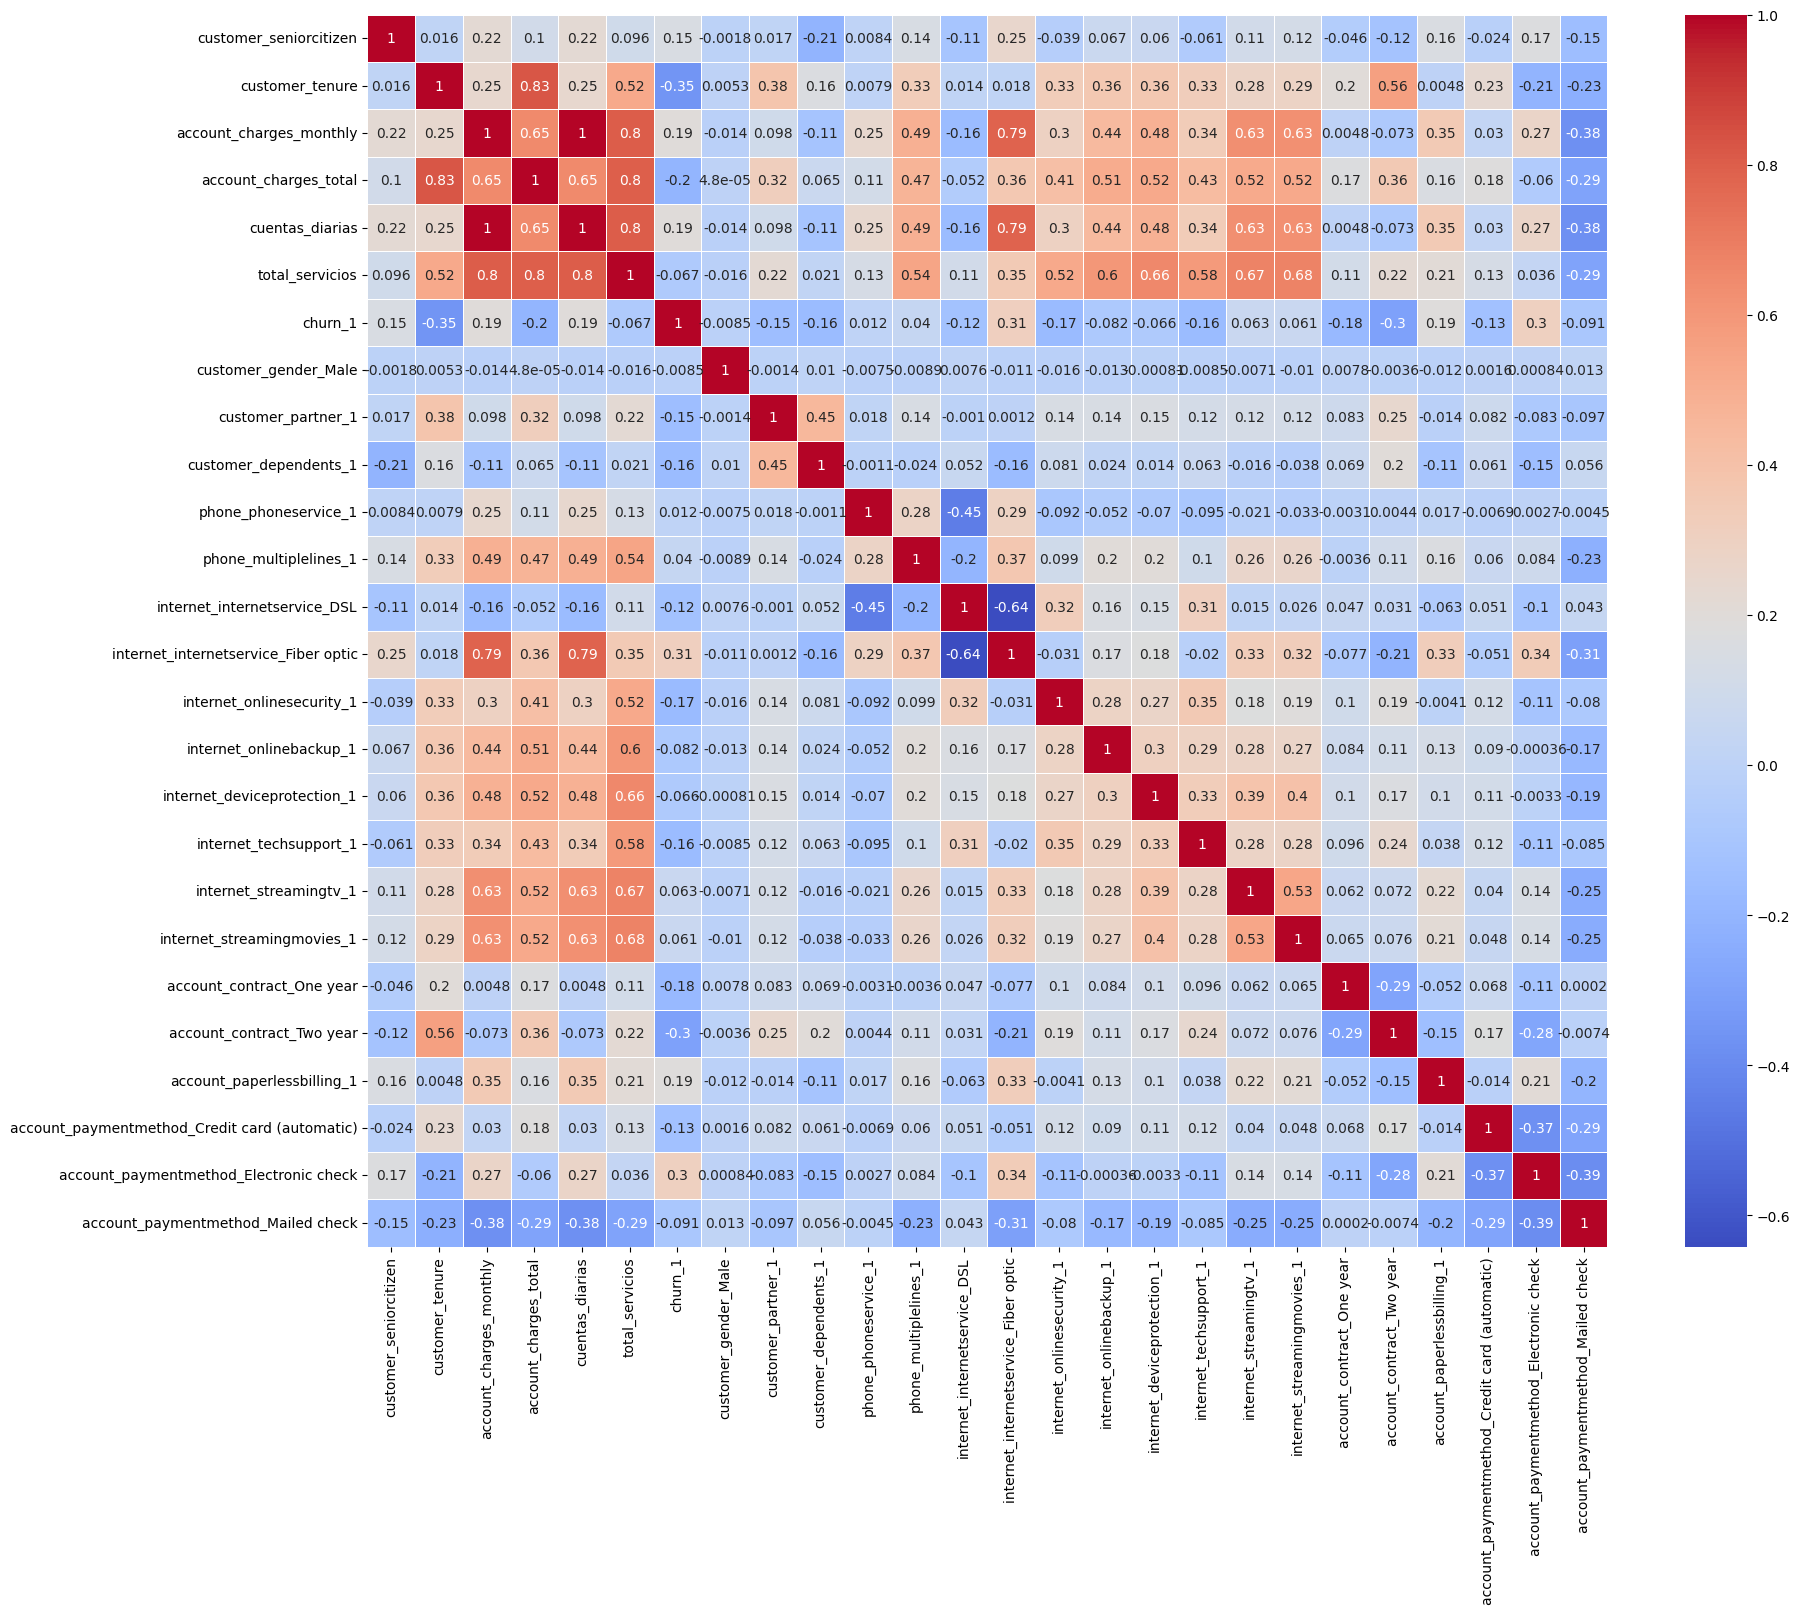

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

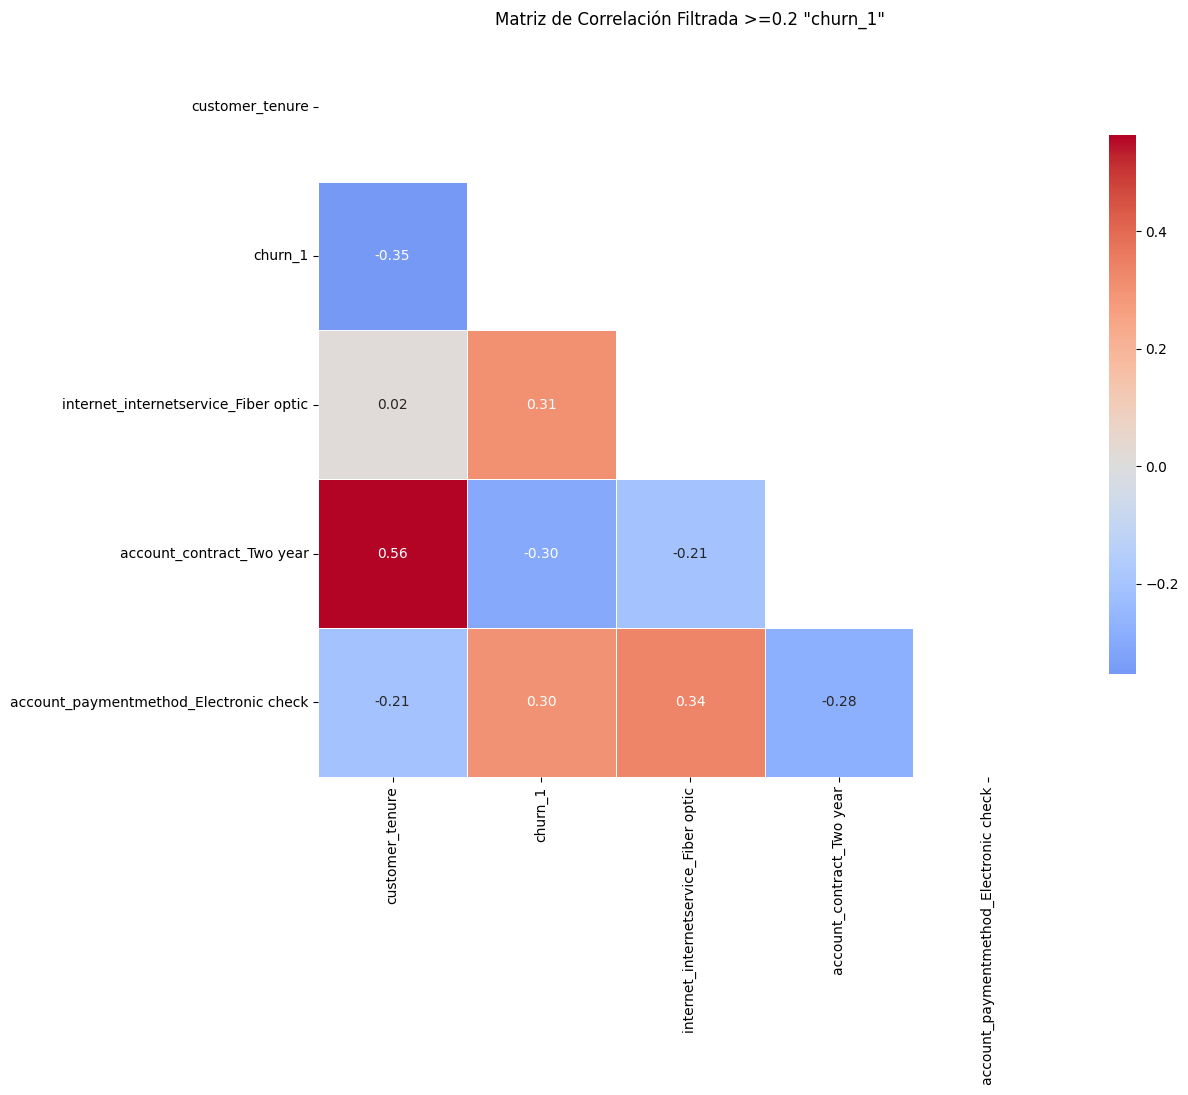

In [229]:
target_var = 'churn_1'
limiar = 0.2
variables_relevantes = corr.index[abs(corr[target_var])> limiar].tolist()
if target_var not in variables_relevantes:
  variables_relevantes.append(target_var)
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.7},
    mask=mascara
)
plt.title(f'Matriz de Correlación Filtrada >={limiar} "{target_var}"')
plt.show()


In [230]:
#Analisis de Multicolinearidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [231]:
X = df_encoded.drop(columns=['churn_1'])

In [232]:
X_const = add_constant(X)

In [234]:
X_const = X_const.astype(float)
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
5,cuentas_diarias,inf
3,account_charges_monthly,inf
6,total_servicios,inf
19,internet_streamingmovies_1,inf
17,internet_techsupport_1,inf
16,internet_deviceprotection_1,inf
14,internet_onlinesecurity_1,inf
15,internet_onlinebackup_1,inf
11,phone_multiplelines_1,inf
10,phone_phoneservice_1,inf


In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import sm
X_filtered = X_const.copy()
cols_to_drop =['cuentas_diarias', 'account_charges_monthly',
    'total_servicios', 'internet_streamingmovies_1',
     'internet_techsupport_1', 'internet_deviceprotection_1',
      'internet_onlinesecurity_1','internet_onlinebackup_1',
      'phone_multiplelines_1', 'phone_phoneservice_1',
      'internet_streamingtv_1e'
]
X_filtered.drop(columns=cols_to_drop, inplace=True)
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)
X_filtered = X_filtered.astype(float)
vif_data = pd.DataFrame()
vif_data['feature'] = X_filtered.columns
vif_data['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]
display(vif_data.sort_values(by='VIF', ascending=False))

ImportError: cannot import name 'sm' from 'statsmodels.api' (/usr/local/lib/python3.11/dist-packages/statsmodels/api.py)

## **Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [ ]:
"""
churn_counts = df['Churn'].value_counts()
churn_proportion = df['Churn'].value_counts(normalize=True)

print("Conteo de clases (Churn):")
print(churn_counts)
print("\nProporción de clases (Churn):")
print(churn_proportion)

# Visualización rápida
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribución de Clientes (Churn vs No Churn)")
plt.xticks(rotation=0)
plt.ylabel("Número de clientes")
plt.show()
"""
df['churn'].value_counts(normalize=True) #variable desvalanceada

## **Balanceo de Clases**

Profundizar en el análisis, aplicando técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

#### **Preparación de Datos (Extensión de tu Código)**
Primero, asegurémonos de que los datos estén codificados y separados en X (features) e y (target):

In [ ]:
import numpy as np


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

X = df.drop(columns=['churn'], axis=1)
y = df['churn']

imputer = SimpleImputer(strategy='constant', fill_value=0)
X_imputed = imputer.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar datos usando el Dataframe codificado
df_encoded = pd.read_csv('/content/datos_TelecomX_codificado.csv')

# Separar X e y
y = df_encoded['Churn_Yes']
X = df_encoded.drop(columns=['Churn_Yes'])

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Distribución original en entrenamiento:", y_train.value_counts())
print("Distribución original en prueba:", y_test.value_counts())

#### **Técnicas de Balanceo**
Random Undersampling (Reducción de la clase mayoritaria)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

print("Distribución después de undersampling:", y_under.value_counts())

SMOTE (Oversampling de la clase minoritaria)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_train_numeric = X_train.astype(int)
# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_train_numeric, y_train)
print("Distribución después de SMOTE:", Counter(y_over))

Combinación SMOTE + Undersampling (SMOTEENN)

In [ ]:
from imblearn.combine import SMOTEENN
X_train_numeric = X_train.astype(int)
# Aplicar SMOTEENN (SMOTE + ENN para limpiar muestras)
smote_enn = SMOTEENN(random_state=42)
X_comb, y_comb = smote_enn.fit_resample(X_train_numeric, y_train)
print("Distribución después de SMOTEENN:", y_comb.value_counts())

#### **Evaluación de Modelos con Datos Balanceados**
Ahora podemos entrenar un modelo, y comparar su rendimiento antes y después del balanceo.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Modelo con datos originales (desbalanceados)
model_original = LogisticRegression(max_iter=1000, random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

print("=== Rendimiento en datos originales (desbalanceados) ===")
print(classification_report(y_test, y_pred_original))
print(confusion_matrix(y_test, y_pred_original))

# Modelo con SMOTE (oversampling)
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_over, y_over)
y_pred_smote = model_smote.predict(X_test)

print("\n=== Rendimiento con SMOTE (oversampling) ===")
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))

#### **Visualización de Resultados**

In [ ]:
import seaborn as sns
# Matriz de confusión para SMOTE
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Matriz de Confusión (SMOTE)")
plt.show()

#### **Interpretación**
La interpretación es la siguiente
Undersampling: Reduce la clase mayoritaria, pero al reducir, esta puede perder información útil.

SMOTE: Genera muestras sintéticas de la clase minoritaria, mejorando el recall (detección de churn).

SMOTEENN: Combina oversampling y limpieza de muestras ruidosas.

Métrica clave:
Foco en Recall (capacidad de detectar clientes que cancelarán).
Compara el classification_report antes/después del balanceo.

## **Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas numéricas a escalar:", numeric_cols)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train_numeric_for_scaling = X_train.astype(int)
X_test_numeric_for_scaling = X_test.astype(int)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_numeric_for_scaling)
X_test_std = scaler.transform(X_test_numeric_for_scaling)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

print("X_train después de estandarización:")
print(X_train_std.head())
print("\nX_test después de estandarización:")
print(X_test_std.head())

In [ ]:
minmax = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

X_train_norm = X_train_norm.astype(int)
X_test_norm = X_test_norm.astype(int)

X_train_norm = minmax.fit_transform(X_train_norm)
X_test_norm = minmax.transform(X_test_norm)

X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)

print("X_train después de normalización (MinMaxScaler):")
print(X_train_norm.head())
print("\nX_test después de normalización (MinMaxScaler):")
print(X_test_norm.head())

In [ ]:
#Validación con modelos claves
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Datos estandarizados
model_std = LogisticRegression(max_iter=1000, random_state=42)
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)
print("Accuracy (estandarizado):", accuracy_score(y_test, y_pred_std))

# Datos normalizados
model_norm = LogisticRegression(max_iter=1000, random_state=42)
model_norm.fit(X_train_norm, y_train)
y_pred_norm = model_norm.predict(X_test_norm)
print("Accuracy (normalizado):", accuracy_score(y_test, y_pred_norm))

In [ ]:
#Modelos No Sensibles a Escala
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train_numeric = X_train.astype(int)
X_test_numeric = X_test.astype(int)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_numeric, y_train)
y_pred_rf = model_rf.predict(X_test_numeric)
print("Accuracy (RF sin escalar):", accuracy_score(y_test, y_pred_rf))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X_train_numeric_for_scaling = X_train.astype(int)
X_test_numeric_for_scaling = X_test.astype(int)

# Ejemplo con SVM (requiere escalado)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Always before the model
    ('model', SVC(kernel='rbf'))
])

pipeline.fit(X_train_numeric_for_scaling, y_train)

In [ ]:
print(df.columns.tolist())

## **Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [ ]:
import numpy as np

# Cargar datos (ejemplo)
df = pd.read_csv('/content/datos_TelecomX_sin_IDs_constantes.csv')

# Codificar 'Churn' a 0 y 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Seleccionar solo columnas numéricas (excluyendo binarias one-hot)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas numéricas:", numeric_cols)

In [ ]:
df.head(4)

In [ ]:
# Calcular matriz de correlación
corr_matrix = df[numeric_cols].corr()

# Mostrar correlación con 'Churn' (ordenado de mayor a menor)
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlación con Churn:\n", churn_corr)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1, vmax=1,
            linewidths=0.5)
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()